In [8]:
import pandas as pd
import matplotlib as mat
import os as os 

In [9]:
os.getcwd()

'C:\\Users\\Amol\\data'

In [10]:
players = pd.read_csv("Player.csv")

In [11]:
print(players.columns)

Index(['Player_Id', 'Player_Name', 'DOB', 'Batting_Hand', 'Bowling_Skill',
       'Country', 'Is_Umpire', 'Unnamed: 7'],
      dtype='object')


In [12]:
players_by_country = players.groupby('Country').count()

In [13]:
abc = pd.read_csv("bycountry.csv" , header = None)
abc.columns =["Country" ,"Players"]

         Country  Players
0      Australia       78
1     Bangladesh        5
2        England       18
3          India      291
4    Netherlands        1
5    New Zealand       26
6       Pakistan       15
7   South Africa       44
8      Sri Lanka       22
9    West Indies       20
10     Zimbabwea        3


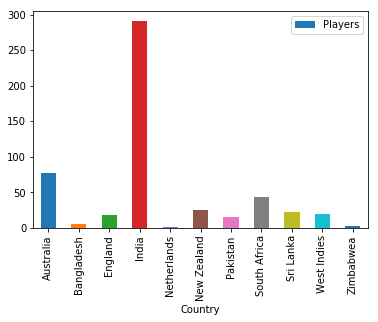

In [63]:
abc.plot.bar(x = "Country" , y = "Players")
print(abc)

In [64]:
ballbyball = pd.read_csv("Ball_by_Ball.csv")

In [65]:
print(ballbyball.columns)

Index(['Match_Id', 'Innings_Id', 'Over_Id', 'Ball_Id', 'Team_Batting_Id',
       'Team_Bowling_Id', 'Striker_Id', 'Striker_Batting_Position',
       'Non_Striker_Id', 'Bowler_Id', 'Batsman_Scored', 'Extra_Type',
       'Extra_Runs', 'Player_dissimal_Id', 'Dissimal_Type', 'Fielder_Id'],
      dtype='object')


In [66]:
ballruns = ballbyball[["Striker_Id" , "Batsman_Scored" ]]


In [67]:
runsbyplayer = ballruns.groupby(["Striker_Id"])["Batsman_Scored"].agg('sum')

In [68]:
ballruns.dtypes

Striker_Id        int64
Batsman_Scored    int64
dtype: object

In [69]:
player_name = players[['Player_Id', 'Player_Name' ]]

In [72]:
runsbyplayername = pd.merge(ballruns, player_name, left_on='Striker_Id', right_on='Player_Id')

In [80]:
ipl_player_score = runsbyplayername.groupby(["Player_Name"])["Batsman_Scored"].agg('sum')

In [93]:
ipl_player_score.to_csv("playerruns.csv")

In [94]:
playerruns = pd.read_csv("playerruns.csv" , header = None)
playerruns.columns =["Players" ,"Runs"]

In [98]:
most_scored = playerruns.sort_values('Runs' , ascending = False)

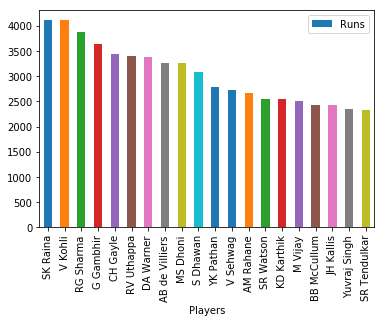

In [116]:
most_scored.head(20).plot.bar(x = "Players" , y = "Runs")


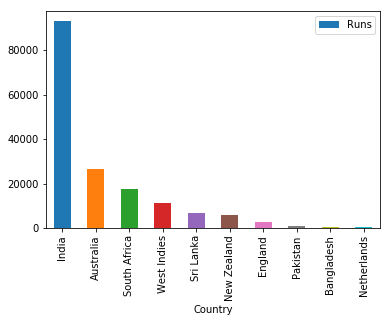

In [126]:
country_name = players[['Player_Id', 'Country' ]]
runsbycountryname = pd.merge(ballruns, country_name, left_on='Striker_Id', right_on='Player_Id')
ipl_country_score = runsbycountryname.groupby(["Country"])["Batsman_Scored"].agg('sum')
ipl_country_score.to_csv("countryruns.csv")
countryruns = pd.read_csv("countryruns.csv" , header = None)
countryruns.columns =["Country" ,"Runs"]
most_country_scored = countryruns.sort_values('Runs' , ascending = False)
most_country_scored.head(10).plot.bar(x = "Country" , y = "Runs")